In [67]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [69]:
img_path = '/opt/ml/input/id-photo-generator/data/matting_human_half/clip_img/1803151818/clip_00000000/1803151818-00000023.jpg'
matting_path = '/opt/ml/input/id-photo-generator/data/matting_human_half/matting/1803151818/matting_00000000/1803151818-00000023.png'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
matting = cv2.imread(matting_path, cv2.IMREAD_UNCHANGED)

In [70]:
matting_rgb = cv2.cvtColor(matting[:, :, :3], cv2.COLOR_BGR2RGB)
matting_alpha = matting[:, :, 3]

In [71]:
matting_alpha

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254]], dtype=uint8)

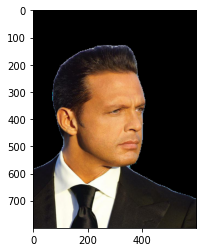

In [72]:
plt.imshow(matting_rgb)

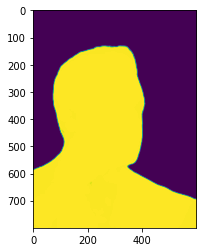

In [73]:
plt.imshow(matting_alpha)

In [74]:
matting_alpha = (matting_alpha != 0) * 1

In [75]:
matting_alpha_3d = [matting_alpha for _ in range(3)]
matting_alpha_3d = np.stack(matting_alpha_3d, axis=-1)

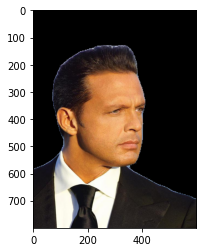

In [76]:
plt.imshow(np.where(matting_alpha_3d == 1, img, 0))

In [147]:
from dataloader import get_dataloaders

train_loader, val_loader = get_dataloaders(
    img_dir='/opt/ml/input/id-photo-generator/data/clip_img',
    matting_dir='/opt/ml/input/id-photo-generator/data/matting',
    csv_path='/opt/ml/input/id-photo-generator/data/dataset.csv'
)

print(train_loader)
print(val_loader)